# Utilisation de Machine Learning puis Deep Learning pour différencier les arbres des fleurs dans le cadre d'un projet ingénieur M2
Date du projet : octobre 2022  
Auteurs : 
- Marie JOIGNEAU marie.joigneau@agrocampus-ouest.fr
- Marion GUNDELWEIN marion.gundelwein@agrocampus-ouest.fr
- Armelle LAJEUNESSE armelle.lajeunesse@agrocampus-ouest.fr
- Laurence REN laurence.ren@agrocampus-ouest.fr

# Contexte

Problématique : Comment différencier les arbres et fleurs pour qu’un drone soit capable de donner le bon engrais en Agroécologie ?

Nous réalisons un pré-traitement sur les données : conversion en jpg, homogéinisation du nombre de pixel, zoom sur les images (pour réduire la dimension), et réduction en noir et blanc, afin d'obtenir les meilleurs résultats possibles. 

2 approches différentes sont ici utilisées pour différencier les arbres des fleurs :
-	Les images sont converties en un dataframe avec des chiffres (pixel avec code RVB). Sur ces données nous réalisation de méthodes de classifications habituelles : random forest, knn, regression logistique, arbres, ….
-	On utilise directement les images et on applique la méthode CNN de Deep Learning pour classifier les arbres et les fleurs. On devrait obtenir de meilleures prédictions.

# Introduction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab_Notebooks

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebooks'
/content


# Packages

In [ ]:
!pip install pyheif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 3.8 MB/s 


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image


In [ ]:
import numpy as np
import numpy
import cv2
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import glob as glob
from PIL import Image
import keras
import numpy as np
# !pip install pyheif
#import pyheif
import shutil
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Pré traitement 1 : convertir en .jpg

Nous allons convertir les dossiers fleurs et arbres des fichiers "arbres" et "fleurs" dans les dossiers "arbres_converties" et "fleurs_converties".

1) Transfert des fichiers .jpg

In [ ]:
filenames_true_jpg_fleurs = glob.glob("fleurs" + "/*.jpg")
filenames_true_jpg_arbres = glob.glob("arbres" + "/*.jpg")

# les fleurs :
for filename in filenames_true_jpg_fleurs:
  shutil.copy(filename, 'fleurs_converties/')
# les arbres :
for filename in filenames_true_jpg_arbres:
  shutil.copy(filename, 'arbres_convertis/')

2) Conversion de .JPG à .jpg et transfert

In [ ]:
filenames_JPG_fleurs = glob.glob("fleurs" + "/*.JPG")
filenames_JPG_arbres = glob.glob("arbres" + "/*.JPG")

# les fleurs :
for filename in filenames_JPG_fleurs:
  image3 = Image.open(filename)
  a = filename[7:(len(filename)-4)] # on vire le fleurs/ et le .JPG
  path = "fleurs_converties/{}.jpg".format(a) # on met dans fleurs_pixel
  #print("le chemin est {}".format(path))
  image3.save(path)
# les arbres :
for filename in filenames_JPG_arbres:
  image3 = Image.open(filename)
  a = filename[7:(len(filename)-4)] # on vire le arbres/ et le .JPG
  path = "arbres_convertis/{}.jpg".format(a) # on met dans fleurs_pixel
  image3.save(path)

3) Conversion de .HEIC à .jpg et transfert

In [ ]:
filenames_HEIC_fleurs = glob.glob("fleurs" + "/*.HEIC")
filenames_HEIC_arbres = glob.glob("arbres" + "/*.HEIC")

# les fleurs :
for filename in filenames_HEIC_fleurs:
  heif_file = pyheif.read(filename)
  data = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
        )
  a = filename[7:(len(filename)-5)] # on vire le fleurs/ et le .HEIC
  path = "fleurs_converties/{}.jpg".format(a) # on met dans fleurs_converties
  data.save(path)
# les arbres :
for filename in filenames_HEIC_arbres:
  heif_file = pyheif.read(filename)
  data = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
        )
  a = filename[7:(len(filename)-5)] # on vire le arbres/ et le .HEIC
  path = "arbres_convertis/{}.jpg".format(a) # on met dans arbres_convertis
  data.save(path)

In [ ]:
filenames_HEIC_fleurs = glob.glob("fleurs" + "/*.heic")
filenames_HEIC_arbres = glob.glob("arbres" + "/*.heic")

# les fleurs :
for filename in filenames_HEIC_fleurs:
  heif_file = pyheif.read(filename)
  data = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
        )
  a = filename[7:(len(filename)-5)] # on vire le fleurs/ et le .heic
  path = "fleurs_converties2/{}.jpg".format(a) # on met dans fleurs_converties
  data.save(path)
# les arbres :
for filename in filenames_HEIC_arbres:
  heif_file = pyheif.read(filename)
  data = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
        )
  a = filename[7:(len(filename)-5)] # on vire le arbres/ et le .heic
  path = "arbres_convertis2/{}.jpg".format(a) # on met dans arbres_convertis
  data.save(path)

# Pré traitement 2 : obtenir le même nombre de pixel


A partir des images des dossiers "fleurs_converties" et "arbres_converties", on change leur nombre de pixel et on les transfert dans les fichiers "Arbres_fleurs/arbres_pixel" et "Arbres_fleurs/fleurs_pixel".

In [ ]:
# 1) IMPORTER LARGEUR HAUTEUR

filenames_fleurs_jpg = glob.glob("fleurs_converties" + "/*.jpg")
filenames_arbres_jpg = glob.glob("arbres_convertis" + "/*.jpg")

fleurs_all = []

# les fleurs :
for filename in filenames_fleurs_jpg:
  im_test = plt.imread(filename)
  fleurs_all.append(im_test.shape[0])
  fleurs_all.append(im_test.shape[1])
# les arbres :
for filename in filenames_arbres_jpg:
  im_test = plt.imread(filename)
  fleurs_all.append(im_test.shape[0])
  fleurs_all.append(im_test.shape[1])


# 2) MEDIANE

mediane_all = statistics.median(fleurs_all)
mediane_all = int(mediane_all)


# 3) EXPORTER LES NOUVELLES IMAGES

# les fleurs :
for filename in filenames_fleurs_jpg:
  image = Image.open(filename)
  new_image = image.resize((mediane_all,mediane_all))
  a = filename[18:len(filename)] # on vire le fleurs_converties/
  path = "Arbres_fleurs/fleurs_pixel/{}".format(a) # on met dans fleurs_pixel
  new_image.save(path)

# les arbres :
for filename in filenames_arbres_jpg:
  image = Image.open(filename)
  new_image = image.resize((mediane_all,mediane_all))
  a = filename[17:len(filename)] # on vire le arbres_convertis/
  path = "Arbres_fleurs/arbres_pixel/{}".format(a) # on met dans arbres_pixel
  new_image.save(path)

# Pré traitement 3 : grayscale

Pré-traitements pour optimiser les méthodes de classifications telles que les arbres, random forest, knn, régression logistique. 


Ici on converties les images de fleurs en noir et blanc afin d'essayer d'optimiser les algorithmes de classification. 

In [ ]:
filenames2 = glob.glob("Arbres_fleurs/arbres_pixel" + "/*.jpg")
# conversion des arbres en noirs et blancs
for filename in filenames2:
    img = Image.open(filename)
    new_image = img.convert('LA')
    plt.imshow(new_image) 
    a = filename[26:(len(filename)-3)]  # on modifie le lien 
    path = "arbres_grey/{}".format(a) 
    new_image.save(path + "png")   

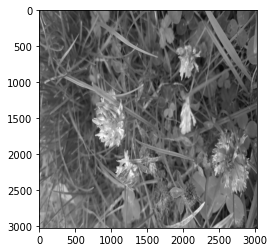

In [ ]:
filenames = glob.glob("Arbres_fleurs/fleurs_pixel" + "/*.jpg")

# conversion des fleurs en noirs et blancs
for filename in filenames:
    img = Image.open(filename)
    new_image = img.convert('LA')
    plt.imshow(new_image) 
    a = filename[26:(len(filename)-3)]  # on modifie le lien 
    path = "fleurs_grey/{}".format(a) 
    new_image.save(path + "png")

# Pré traitement 4 : zoom

In [ ]:
filenames2 = glob.glob("Arbres_fleurs/arbres_pixel" + "/*.jpg")

# zoomer sur les arbres 
for filename in filenames2:
    img = Image.open(filename)
    zoom = 4
    new_image = img.resize((img.size[0],img.size[1]),box=(((img.size[0]/2)-img.size[0]/(zoom*2)),((img.size[1]/2)-img.size[1]/(zoom*2)),((img.size[0]/2)+img.size[0]/(zoom*2)),((img.size[1]/2)+img.size[1]/(zoom*2))))
    plt.imshow(new_image) 
    a = filename[26:(len(filename)-3)]  # on modifie le lien 
    path = "arbres_zoom/{}".format(a) 
    new_image.save(path + "jpg")

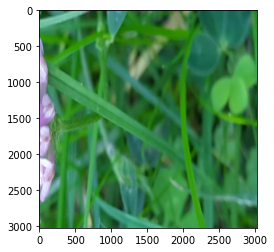

In [ ]:
filenames = glob.glob("Arbres_fleurs/fleurs_pixel" + "/*.jpg")
# zoomer sur les fleurs 
for filename in filenames:
    img = Image.open(filename)
    zoom = 4
    new_image = img.resize((img.size[0],img.size[1]),box=(((img.size[0]/2)-img.size[0]/(zoom*2)),((img.size[1]/2)-img.size[1]/(zoom*2)),((img.size[0]/2)+img.size[0]/(zoom*2)),((img.size[1]/2)+img.size[1]/(zoom*2))))
    plt.imshow(new_image) 
    a = filename[26:(len(filename)-3)]  # on modifie le lien 
    path = "fleurs_zoom/{}".format(a) 
    new_image.save(path + "jpg")

# Convertir les images en un dataframe de valeurs


Ci-dessous le code pour le jeu de données original. Nous avons fait de même pour les jeux de données en noir et blanc, et zoomé.

In [19]:
# arbres 
path3 = "Arbres_fleurs/arbres_pixel"
filenames3 = glob.glob(path3 + ("/*.jpg") )
arbres= []
df2 = pd.DataFrame()
df_arbres = pd.DataFrame()

for filename in filenames3:
    arbres.append(plt.imread(filename)) 

for elem in arbres :
    array1D = np.reshape(elem[3], (1,np.product(elem[3].shape)))
    array1D = pd.DataFrame(array1D)
    df2 = df2.append(array1D, ignore_index= True)

df2.insert(loc=0, column="type", value="arbre")
df2.to_csv('data/arbre_df.csv')

In [25]:
# fleurs 
path2 = "Arbres_fleurs/fleurs_pixel"
filenames2 = glob.glob(path2 + ("/*.JPG" ))
# 1e étape: lire tout les fichiers du file fleur avec le code de Marion

fleurs= []
for filename in filenames2:
    fleurs.append(plt.imread(filename))

# 2e étape: transformer en ligne pour chaque element: 
df = pd.DataFrame()
for elem in fleurs :
    array1D = np.reshape(elem[3], (1,np.product(elem[3].shape)))
    array1D = pd.DataFrame(array1D)
    df = df.append(array1D, ignore_index= True)

# ajouter la colonne 'typeé 
df.insert(loc=0, column="type", value="fleur")

# faire ressortir le csv
df.to_csv('data/fleur_df.csv')

# Classification jeu de données original

## Importation des données

In [ ]:
data = pd.read_csv("data/normal_pixel.csv",sep=",")

Y = data["type"]
X = data
X.drop(columns = ["Unnamed: 0","type"], inplace = True)

# par défaut on découpe en 70% pour l'apprentissage et 30% pour le test :
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,shuffle=True, test_size=0.3)

## K plus proches voisins

La méthode des K voisins repose sur le fait que l’algorithme va regarder, pour chaque point, ses K voisins, et ainsi déterminer à quelle classe il appartient en regardant les classes de ses K voisins.

Nous avons recherché le meilleur k pour réaliser une méthode des k-voisins. Nous avons ensuite enregistré la précision associée à ce modèle pour pouvoir le comparer à d’autres méthodes de Machine Learning.

In [ ]:
scores=[]
k_range=range(1,100)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
kbest = scores.index(max(scores))

print("meilleur k : ",kbest+1,"avec une précision de ",max(scores))

meilleur k :  2 avec une précision de  0.5961538461538461


## Régression logistique

Le modèle de régression logistique est le suivant :
Y=ax1+bx2+cx3+⋯+K+ ε où f(X)= aX+b
Avec :
- Y, la variable à expliquer, aléatoire et dépendante
- a,…,K les coefficients (pente et ordonnée à l’origine) à estimer
- X=(x1,…,xq), l’ensemble des variables explicatives, indépendantes
- ε, une variable aléatoire qui représente l’erreur

L’Intelligence Artificielle cherche à trouver l’équation de régression logistique afin de déterminer la classe de Y.

In [ ]:
# On choisit arbitrairement un max d'iteration a 4000:
logreg=LogisticRegression(max_iter=4000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
score_RL = metrics.accuracy_score(y_test,y_pred)

print("précision :", score_RL, "avec un max_iter de ",4000)

précision : 0.6089743589743589 avec un max_iter de  4000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Arbres de décisions

Nous avons choisi de comparer les méthodes précédentes à l’arbre de décision, elle aussi applicable à un jeu de données quantitatives (concernant les variables explicatives). Cette méthode permet de classifier les observations. Chaque sous-branche de l’arbre mène à une prise de décision quant à une valeur de la variable de sortie (c’est-à-dire ici au choix de l'arbre ou de la fleur). On définit la profondeur de l’arbre comme le nombre maximum de noeuds avant d’atteindre une feuille. Chaque noeud de l’arbre représente une règle.

précision : 0.6282051282051282


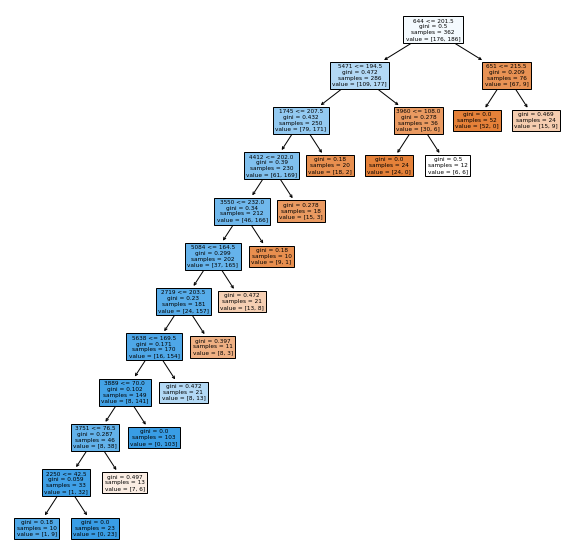

In [ ]:
### Nous faisons le modèle d'arbre de décision:

# Deux paramètres : 
# un sommet n’est pas segmenté s’il est composé de moins de 30 individus (min_samples_split = 30) ;
# une segmentation est validée si et seulement si les feuilles générées comportent tous au moins 10 observations (min_samples_leaf = 10).
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

### Construction de l'arbre:
arbreFirst.fit(X = X_train, y = y_train)
y_pred=arbreFirst.predict(X_test)
score_AD = metrics.accuracy_score(y_test,y_pred)
print("précision :", score_AD)

### Affichage graphique de l'arbre - depuis sklearn 0.21:
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(X.columns),filled=True)
plt.show()

## Random forest

In [ ]:
# On créé un Random Forest de 100 arbres (Gaussian Classifier)
rf = RandomForestClassifier(n_estimators=100)

# on lance le training sur notre dataset de train)
rf.fit(X_train,y_train)

# On applique le modèle que l'on vient d'entraîner sur l'échantillon de test
y_pred = rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7051282051282052


# Classification pour gris

## Importation des données

In [ ]:
data = pd.read_csv("data/grey.csv",sep=",")

Y = data["type"]
X = data
X.drop(columns = ["Unnamed: 0","type"], inplace = True)

# par défaut on découpe en 70% pour l'apprentissage et 30% pour le test :
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,shuffle=True, test_size=0.3)

## K plus proches voisins

In [ ]:
scores=[]
k_range=range(1,100)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
kbest = scores.index(max(scores))

print("meilleur k : ",kbest+1,"avec une précision de ",max(scores))

meilleur k :  2 avec une précision de  0.5192307692307693


## Régression logistique

In [ ]:
# On choisit arbitrairement un max d'iteration a 4000:
logreg=LogisticRegression(max_iter=4000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
score_RL = metrics.accuracy_score(y_test,y_pred)

print("précision :", score_RL, "avec un max_iter de ",4000)

précision : 0.5641025641025641 avec un max_iter de  4000


## Arbres de décision

précision : 0.6089743589743589


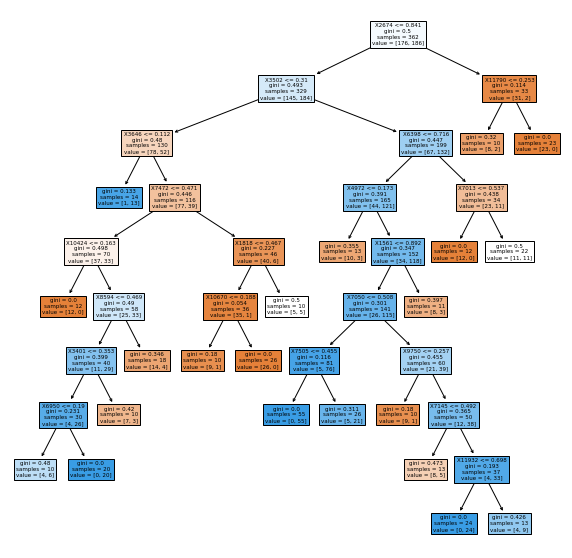

In [ ]:
### Nous faisons le modèle d'arbre de décision:

# Deux paramètres : 
# un sommet n’est pas segmenté s’il est composé de moins de 30 individus (min_samples_split = 30) ;
# une segmentation est validée si et seulement si les feuilles générées comportent tous au moins 10 observations (min_samples_leaf = 10).
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

### Construction de l'arbre:
arbreFirst.fit(X = X_train, y = y_train)
y_pred=arbreFirst.predict(X_test)
score_AD = metrics.accuracy_score(y_test,y_pred)
print("précision :", score_AD)

### Affichage graphique de l'arbre - depuis sklearn 0.21:
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(X.columns),filled=True)
plt.show()

## Random Forest

In [ ]:
# On créé un Random Forest de 100 arbres (Gaussian Classifier)
rf = RandomForestClassifier(n_estimators=100)

# on lance le training sur notre dataset de train)
rf.fit(X_train,y_train)

# On applique le modèle que l'on vient d'entraîner sur l'échantillon de test
y_pred = rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7115384615384616


# Classification pour zoom

## Importation des donnnées 

In [ ]:
data = pd.read_csv("data/zoom.csv",sep=",")

Y = data["type"]
X = data
X.drop(columns = ["Unnamed: 0","type"], inplace = True)

# par défaut on découpe en 70% pour l'apprentissage et 30% pour le test :
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,shuffle=True, test_size=0.3)


## K plus proches voisins

In [ ]:
scores=[]
k_range=range(1,100)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
kbest = scores.index(max(scores))

print("meilleur k : ",kbest+1,"avec une précision de ",max(scores))

meilleur k :  62 avec une précision de  0.6923076923076923


## Régression logistique


In [ ]:
# On choisit arbitrairement un max d'iteration a 4000:
logreg=LogisticRegression(max_iter=4000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
score_RL = metrics.accuracy_score(y_test,y_pred)

print("précision :", score_RL, "avec un max_iter de ",4000)

précision : 0.5769230769230769 avec un max_iter de  4000


## Arbres de décisions

précision : 0.6987179487179487


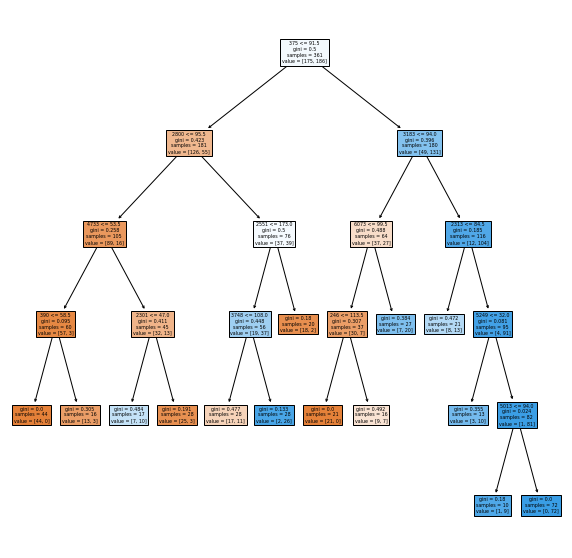

In [ ]:
### Nous faisons le modèle d'arbre de décision:

# Deux paramètres : 
# un sommet n’est pas segmenté s’il est composé de moins de 30 individus (min_samples_split = 30) ;
# une segmentation est validée si et seulement si les feuilles générées comportent tous au moins 10 observations (min_samples_leaf = 10).
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

### Construction de l'arbre:
arbreFirst.fit(X = X_train, y = y_train)
y_pred=arbreFirst.predict(X_test)
score_AD = metrics.accuracy_score(y_test,y_pred)
print("précision :", score_AD)

### Affichage graphique de l'arbre - depuis sklearn 0.21:
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(X.columns),filled=True)
plt.show()

## Random Forest

In [ ]:
# On créé un Random Forest de 100 arbres (Gaussian Classifier)
rf = RandomForestClassifier(n_estimators=100)

# on lance le training sur notre dataset de train)
rf.fit(X_train,y_train)

# On applique le modèle que l'on vient d'entraîner sur l'échantillon de test
y_pred = rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.782051282051282


# Matrice de confusion du meilleur modèle

Soit ici le random forest dans le jeu de données zoomé.

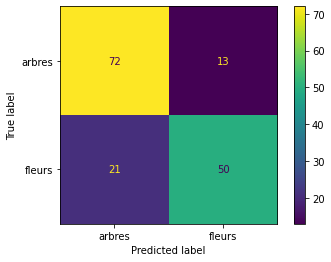

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["arbres", "fleurs"])

cm_display.plot()
plt.show()

# Deep learning (CNN)

Pour rechercher le meilleur modèle de CNN, nous avons utilisé les images en couleurs non-zoomées.

A partir d'un modèle type de CNN, nous avons testé de modifier différents paramètres :
- Le nombre de couches de convolution (de 0 à 4 couches) et le nombre de filtres associés
- Ajout de couches drop
- La taille du batch size (de 32 à 300)
- Le type de fonction d'activation (relu, sigmoïd, softmax)
- L'optimizer (adam, SGD)

Nous avons obtenu le meilleur modèle de CNN pour les paramètres suivant :
- Batch size = 32
- Nombre de couches de convolution = 2 avec des filtres égaux à 16 et 32 pour la couche 1 et 2 respectivement
- La fonction d'activation relu
- L'optimizer adam

Nous avons testé ce modèle sur les images en noir et blanc et les images zoomées.
En plus des jeux de données train et validation, nous avons utilisé un jeu de données test qui est constitué soit par une partie de notre jeu de données initial (pour couleurs, noir et blanc et images zoomées) soit par de nouvelles images d'arbres et de fleurs (en couleurs).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Meilleur modèle sur image en couleur

Batch size = 32, nombre de couche de convolution = 2, fonction d'activation = relu, optimizer =adam 

Found 418 files belonging to 2 classes.
Using 335 files for training.
['arbres_pixel', 'fleurs_pixel']
Found 418 files belonging to 2 classes.
Using 83 files for validation.
Found 100 files belonging to 2 classes.
Epoch 1/10
11/11 [==============================] - 34s 2s/step - loss: 2.4056 - accuracy: 0.5433 - val_loss: 0.8038 - val_accuracy: 0.4940
Epoch 2/10
11/11 [==============================] - 37s 2s/step - loss: 0.5770 - accuracy: 0.6597 - val_loss: 0.4837 - val_accuracy: 0.7470
Epoch 3/10
11/11 [==============================] - 31s 2s/step - loss: 0.3060 - accuracy: 0.9045 - val_loss: 0.2941 - val_accuracy: 0.8916
Epoch 4/10
11/11 [==============================] - 35s 2s/step - loss: 0.1877 - accuracy: 0.9522 - val_loss: 0.2352 - val_accuracy: 0.9157
Epoch 5/10
11/11 [==============================] - 30s 2s/step - loss: 0.0875 - accuracy: 0.9910 - val_loss: 0.3546 - val_accuracy: 0.9036
Epoch 6/10
11/11 [==============================] - 30s 2s/step - loss: 0.0602 - accur

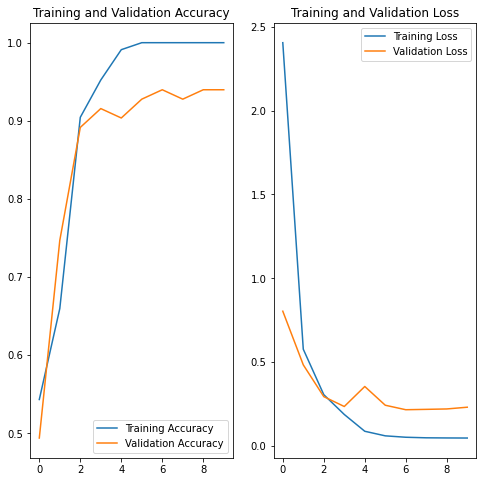

4/4 - 49s - loss: 0.7460 - accuracy: 0.8200 - 49s/epoch - 12s/step

Test accuracy: 0.8199999928474426


In [ ]:
## Accès au dossier images zoomées
import pathlib
path = "Donnees_test/couleur"
data_dir = pathlib.Path(path)

batch_size = 32 
img_height =256
img_width =256

## jeu de données train 
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# vérification
class_names = train_ds.class_names
print(class_names)

## jeu de données de validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

## jeu de données test
path_test = "Donnees_test/couleur_test"
data_dir_test = pathlib.Path(path_test)

test_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    batch_size = batch_size, 
    image_size = (img_height, img_width),
    seed = 123,
    validation_split = None
)

## Créer le modèle

class_names = train_ds.class_names
num_classes = len(class_names)


from keras import regularizers
from keras.layers.core import Dropout


model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', # algo d'opitmisation 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              # tell us how much the predicted output of the model differs from the actual output
              # quantity that a model should seek to minimize during training
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

## Accuracy et Loss
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Accuracy test
test_loss, test_acc = model.evaluate(test_images, verbose=2)
print('\nTest accuracy:', test_acc)

## Meilleur modèle sur image en noir et blanc

Found 421 files belonging to 2 classes.
Using 337 files for training.
Found 421 files belonging to 2 classes.
Using 84 files for validation.
Found 100 files belonging to 2 classes.
Epoch 1/10
11/11 [==============================] - 225s 8s/step - loss: 2.7296 - accuracy: 0.5252 - val_loss: 0.8045 - val_accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 87s 4s/step - loss: 0.5164 - accuracy: 0.7656 - val_loss: 0.3690 - val_accuracy: 0.8929
Epoch 3/10
11/11 [==============================] - 92s 4s/step - loss: 0.3016 - accuracy: 0.9228 - val_loss: 0.2341 - val_accuracy: 0.9524
Epoch 4/10
11/11 [==============================] - 87s 4s/step - loss: 0.1901 - accuracy: 0.9674 - val_loss: 0.1958 - val_accuracy: 0.9524
Epoch 5/10
11/11 [==============================] - 88s 4s/step - loss: 0.1367 - accuracy: 0.9703 - val_loss: 0.1845 - val_accuracy: 0.9524
Epoch 6/10
11/11 [==============================] - 87s 4s/step - loss: 0.1014 - accuracy: 0.9852 - val_loss: 0.2043 -

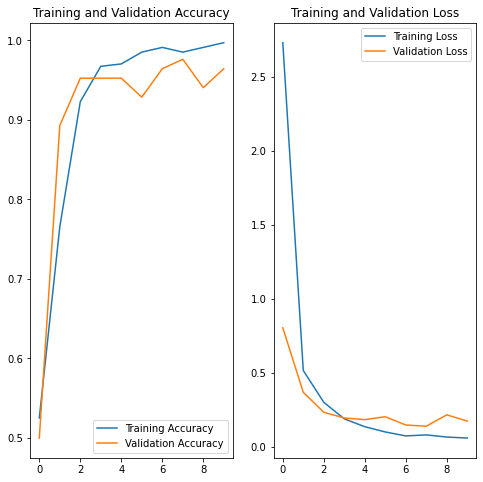

4/4 - 88s - loss: 0.8753 - accuracy: 0.7800 - 88s/epoch - 22s/step

Test accuracy: 0.7799999713897705


In [ ]:
import pathlib
path = "Donnees_test/grey"
data_dir = pathlib.Path(path)

batch_size = 32 
img_height =256
img_width =256

# jeu de données train 
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# jeu de données de validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

path_test = "Donnees_test/grey_test"
data_dir_test = pathlib.Path(path_test)
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    batch_size = batch_size, 
    image_size = (img_height, img_width),
    seed = 123,
    validation_split = None
)

# créer le modèle

class_names = train_ds.class_names
num_classes = len(class_names)


from keras import regularizers
from keras.layers.core import Dropout


model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Accuracy et loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Accuracy test
test_loss, test_acc = model.evaluate(test_images, verbose=2)
print('\nTest accuracy:', test_acc)

##Meilleur modèle image zoomées

Found 417 files belonging to 2 classes.
Using 334 files for training.
['arbres_zoom', 'fleurs_zoom']
Found 417 files belonging to 2 classes.
Using 83 files for validation.
Found 100 files belonging to 2 classes.
Epoch 1/10
11/11 [==============================] - 126s 5s/step - loss: 1.9856 - accuracy: 0.6946 - val_loss: 0.3809 - val_accuracy: 0.8916
Epoch 2/10
11/11 [==============================] - 27s 2s/step - loss: 0.4442 - accuracy: 0.9012 - val_loss: 0.2829 - val_accuracy: 0.8916
Epoch 3/10
11/11 [==============================] - 26s 2s/step - loss: 0.2646 - accuracy: 0.9311 - val_loss: 0.2873 - val_accuracy: 0.8916
Epoch 4/10
11/11 [==============================] - 26s 2s/step - loss: 0.2036 - accuracy: 0.9521 - val_loss: 0.2819 - val_accuracy: 0.9398
Epoch 5/10
11/11 [==============================] - 29s 2s/step - loss: 0.1535 - accuracy: 0.9731 - val_loss: 0.3410 - val_accuracy: 0.9277
Epoch 6/10
11/11 [==============================] - 27s 2s/step - loss: 0.1300 - accura

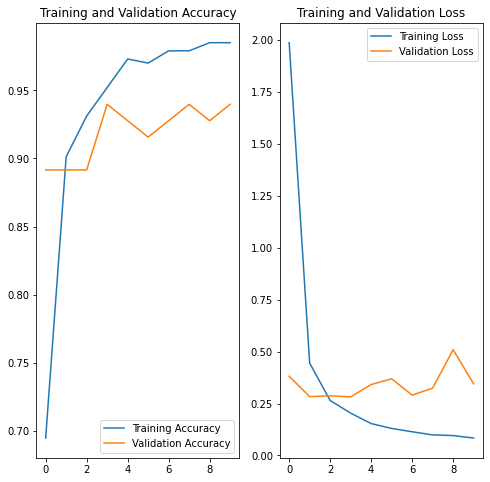

4/4 - 46s - loss: 0.8480 - accuracy: 0.7700 - 46s/epoch - 11s/step

Test accuracy: 0.7699999809265137


In [ ]:
## Accès au dossier images zoomées
import pathlib
path = "Donnees_test/zoom"
data_dir = pathlib.Path(path)

batch_size = 32 
img_height =256
img_width =256

## jeu de données train 
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# vérification
class_names = train_ds.class_names
print(class_names)

## jeu de données de validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

## Jeu de données test
path_test = "Donnees_test/zoom_test"
data_dir_test = pathlib.Path(path_test)
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    batch_size = batch_size, 
    image_size = (img_height, img_width),
    seed = 123,
    validation_split = None
)

## Créer le modèle

from keras import regularizers
from keras.layers.core import Dropout

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', # algo d'opitmisation 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Accuracy et loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## accuracy à partir du jeu de données test
test_loss, test_acc = model.evaluate(test_images, verbose=2)
print('\nTest accuracy:', test_acc)

## Meilleur modèle avec un test sur de nouvelles images

In [ ]:
## Accès au dossier images en couleurs
import pathlib
path = "Arbres_fleurs"
data_dir = pathlib.Path(path)

batch_size = 32 
img_height =256
img_width =256

## jeu de données train 
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

## jeu de données de validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

## Jeu de données test
path_test = "new_couleur_test"
data_dir_test = pathlib.Path(path_test)

test_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    batch_size = batch_size, 
    image_size = (img_height, img_width),
    seed = 123,
    validation_split = None
)

## Créer le modèle

from keras import regularizers
from keras.layers.core import Dropout

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Accuracy et Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## accuracy sur le jeu de données test
test_loss, test_acc = model.evaluate(test_images, verbose=2)
print('\nTest accuracy:', test_acc)